# Bayesian Model Mixing (BMM): Strong and weak coupling expansions

## Alexandra Semposki

### Date: 23 July 2021

In this notebook, I implement the class __Mixing__ and check to see what kind of results I can get with the orders ks = 5 and kl = 23. In the final version of this class/notebook/project, this should all be written into a package that a user can play with.

In [1]:
#import standard packages
import numpy as np
from scipy import special, integrate, stats
import math as math
import time as time
import matplotlib.pyplot as plt
%matplotlib inline

#import the class
from class_expansions import Mixing, Switching

In [2]:
#run the class initialization to make sure it works
g_true = np.linspace(1e-6, 0.5, 100)
g_data = np.linspace(0.12, 0.2, 20)
loworder = np.array([5, 10, 20])
highorder = np.array([5, 10, 20])

first = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [3]:
#call the calculations for low and high g
result_low = first.low_g(g_true, loworder)
result_high = first.high_g(g_true, highorder)

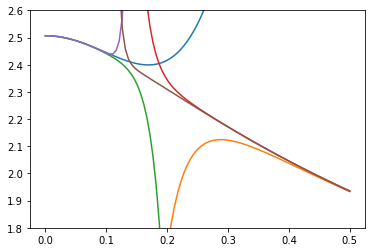

In [4]:
#checking the expansions to make sure the functions work
fig = plt.figure()
ax = plt.axes()
ax.set_ylim(1.8,2.6)
for i in range(3):
    plt.plot(g_true, result_low[i])
    plt.plot(g_true, result_high[i])

[ 5 10 20]


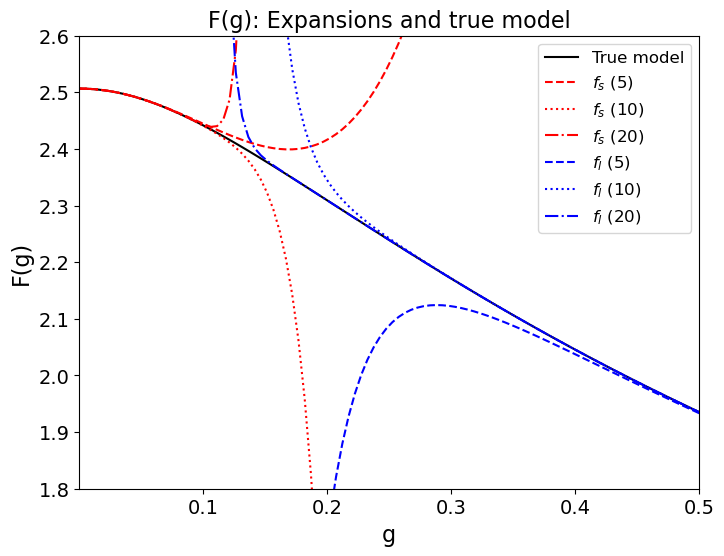

In [5]:
#running the plotting function to see how well it plots
print(loworder)
first.plot_models(g_true, loworder, highorder)

In [6]:
#now checking that multiple arrays will work
nlowk = np.array([5, 23, 50])
nhighk = np.array([5, 23, 50])

In [7]:
second = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [8]:
result_nlow = second.low_g(g_true, nlowk)

In [9]:
print(result_nlow)

[[ 2.50662827e+00  2.50643647e+00  2.50586224e+00  2.50490866e+00
   2.50358088e+00  2.50188608e+00  2.49983352e+00  2.49743449e+00
   2.49470235e+00  2.49165252e+00  2.48830246e+00  2.48467169e+00
   2.48078180e+00  2.47665641e+00  2.47232121e+00  2.46780395e+00
   2.46313441e+00  2.45834446e+00  2.45346799e+00  2.44854097e+00
   2.44360142e+00  2.43868941e+00  2.43384706e+00  2.42911856e+00
   2.42455014e+00  2.42019009e+00  2.41608876e+00  2.41229855e+00
   2.40887392e+00  2.40587137e+00  2.40334948e+00  2.40136886e+00
   2.39999219e+00  2.39928419e+00  2.39931167e+00  2.40014344e+00
   2.40185042e+00  2.40450556e+00  2.40818384e+00  2.41296235e+00
   2.41892018e+00  2.42613852e+00  2.43470058e+00  2.44469165e+00
   2.45619906e+00  2.46931220e+00  2.48412252e+00  2.50072351e+00
   2.51921074e+00  2.53968180e+00  2.56223636e+00  2.58697615e+00
   2.61400493e+00  2.64342854e+00  2.67535486e+00  2.70989383e+00
   2.74715744e+00  2.78725974e+00  2.83031684e+00  2.87644689e+00
   2.92577

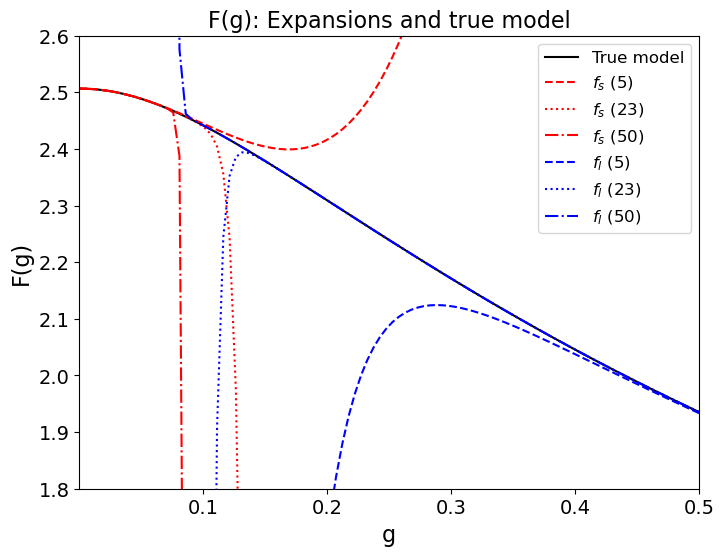

In [10]:
second.plot_models(g_true, nlowk, nhighk)

What percent error would you like on your data (please enter a decimal)?0.01


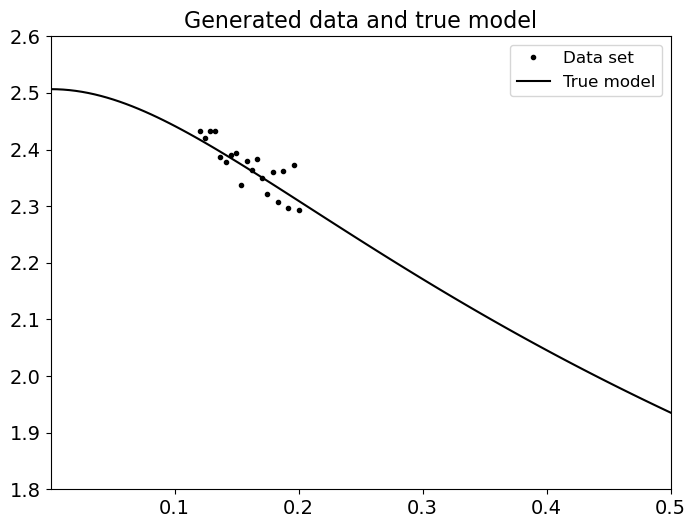

Data set:  [2.43220108 2.41995338 2.43277435 2.43311742 2.38665548 2.37709814
 2.38991915 2.39380967 2.33821526 2.37938637 2.36377586 2.38325646
 2.34893882 2.32154232 2.36015921 2.30689752 2.36213881 2.29715338
 2.37258668 2.29287081]
Standard deviations:  [0.02432201 0.02419953 0.02432774 0.02433117 0.02386655 0.02377098
 0.02389919 0.0239381  0.02338215 0.02379386 0.02363776 0.02383256
 0.02348939 0.02321542 0.02360159 0.02306898 0.02362139 0.02297153
 0.02372587 0.02292871]


In [11]:
data, sigma = second.generate_data(g_true, g_data)

print('Data set: ', data)
print('Standard deviations: ', sigma)

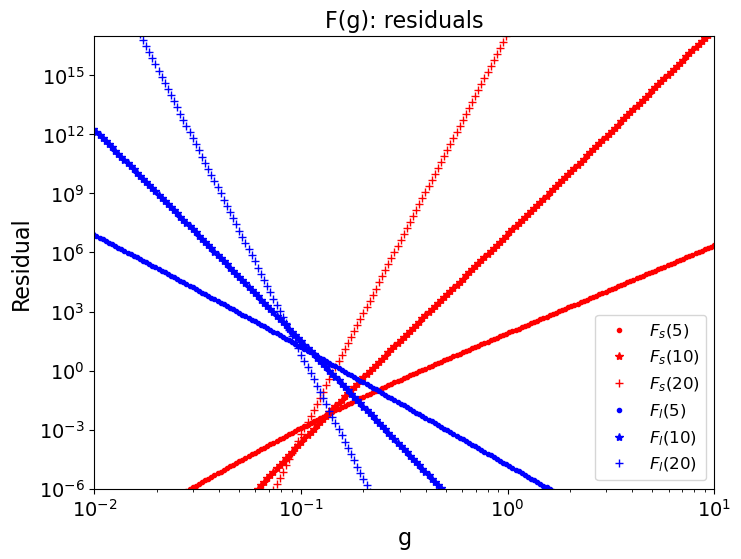

In [12]:
second.residuals(loworder, highorder)

In [13]:
#check functionality of likelihoods in the class
one = second.likelihood_low(g_data, data, sigma, loworder)
two = second.likelihood_high(g_data, data, sigma, highorder)

print('Small-g likelihoods: {} \n\nLarge-g likelihoods: {}'.format(one, two))

Small-g likelihoods: [[1.58147027e+001 1.64304136e+001 1.37731237e+001 1.24522172e+001
  9.52917767e+000 6.77878216e+000 1.31051441e+001 1.51376788e+001
  3.92906488e-001 1.11216594e+001 5.25214903e+000 1.33415752e+001
  1.71567948e+000 5.93557848e-002 3.84684178e+000 3.24867526e-003
  3.30048907e+000 1.55786121e-004 4.30785318e+000 8.68508057e-006]
 [1.21266782e+001 1.39693180e+001 5.86902266e+000 3.08942030e+000
  1.56478968e+001 1.48813066e+001 4.28284801e+000 6.26312306e-001
  8.48193958e+000 5.17812168e-003 1.80075227e-004 5.38199950e-011
  1.25985633e-013 8.94062806e-020 1.57432298e-044 8.02523215e-059
  1.68036754e-118 3.78919324e-163 1.76521662e-298 0.00000000e+000]
 [3.36854554e+000 5.25870670e-004 2.20136073e-015 7.05038974e-065
  7.23215112e-289 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.0

Now we need to work on implementing the solver with different switching functions and setups.

In [14]:
trace = second.mixed_model(g_data, data, sigma, loworder, highorder)

What switching function would you like to use: logistic, cdf, or cosine?cosine
Enter a guess for the mean of the parameter g3: 0.16
Enter a guess for the standard deviation of the parameter g3: 0.01
Using 10 walkers with 1000 steps each, for a total of 10000 samples.
Calculation finished!
Duration = 1 min, 19 sec.
How many burn-in samples per walker?200
Using 200 samples as burn-in, for a total of 2000 burn-in samples.


In [15]:
print(trace)

[0.1256583  0.12107328 0.12107328 ... 0.13317118 0.13623778 0.13668311]


__TO DO__: 
- Work on the next few segments to get the plots to work for any case selected in the mixed_model cell above.
- Include the PPD functions in the class (or another class) and call them below as a check. 

In [16]:
#print the mean of the trace
mean_g3 = np.mean(trace.T)
print('Mean of g3: {}'.format(mean_g3))

#calculate credible intervals 
ci_g3 = second.credible_intervals(trace, 0.95)
print('Credible interval, g3: {}'.format(ci_g3))

Mean of g3: 0.13280868300719842
Credible interval, g3: [0.12306616 0.14535589]


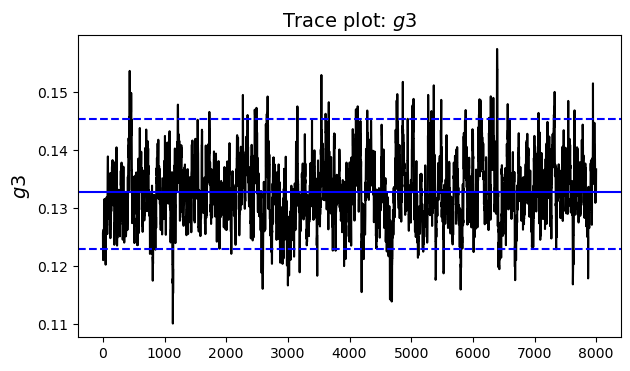

In [17]:
#plot the trace---finish later and put into a function to adjust for each result from the sampler
fig = plt.figure(figsize=(7,4*1), dpi=100)
ax = plt.axes()

ax.plot(trace.T, 'k')
ax.set_ylabel(r'$g3$', fontsize=14)
ax.set_title(r'Trace plot: $g3$', fontsize=14)

ax.axhline(y=mean_g3, color='b', linestyle='solid')
ax.axhline(y=ci_g3[0], color='b', linestyle='dashed')
ax.axhline(y=ci_g3[1], color='b', linestyle='dashed')